# PubliPlots Examples

Comprehensive guide to creating publication-ready visualizations with PubliPlots.

---

## Table of Contents

1. [Setup](#1-setup)
2. [Bar Plots](#2-bar-plots)
   - 2.1 [Simple Bar Plot](#21-simple-bar-plot)
   - 2.2 [Bar Plot with Error Bars](#22-bar-plot-with-error-bars)
   - 2.3 [Bar Plot with Hue (Color Groups)](#23-bar-plot-with-hue-color-groups)
   - 2.4 [Bar Plot with Hatch Only](#24-bar-plot-with-hatch-only)
   - 2.5 [Bar Plot with Hue + Hatch (Double Split)](#25-bar-plot-with-hue--hatch-double-split)
   - 2.6 [Horizontal Bar Plot](#26-horizontal-bar-plot)
   - 2.7 [Bar Plot with Custom Colors](#27-bar-plot-with-custom-colors)
3. [Hatch Pattern Modes](#3-hatch-pattern-modes)
   - 3.1 [Comparing Hatch Modes](#31-comparing-hatch-modes)
   - 3.2 [Setting Global Hatch Mode](#32-setting-global-hatch-mode)
4. [Scatter Plots](#4-scatter-plots)
   - 4.1 [Basic Scatter Plot](#41-basic-scatter-plot)
   - 4.2 [Scatter with Size Encoding](#42-scatter-with-size-encoding)
   - 4.3 [Scatter with Categorical Hue](#43-scatter-with-categorical-hue)
   - 4.4 [Scatter with Continuous Hue](#44-scatter-with-continuous-hue)
5. [Circle Heatmaps](#5-circle-heatmaps)
   - 5.1 [Basic Circle Heatmap](#51-basic-circle-heatmap)
   - 5.2 [Circle Heatmap with Continuous Colors](#52-circle-heatmap-with-continuous-colors)
   - 5.3 [Large Circle Heatmap](#53-large-circle-heatmap)
6. [Venn Diagrams](#6-venn-diagrams)
   - 6.1 [2-Way Venn Diagram](#61-2-way-venn-diagram)
   - 6.2 [3-Way Venn Diagram](#62-3-way-venn-diagram)
   - 6.3 [Venn with Statistical Testing](#63-venn-with-statistical-testing)

---

## 1. Setup

Import libraries and set the publication style globally.

In [1]:
import publiplots as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set publication style globally
pp.set_publication_style()

# For inline display in Jupyter
%matplotlib inline

print(f"PubliPlots version: {pp.__version__}")
print("Setup complete!")

PubliPlots version: 0.1.1
Setup complete!


---

## 2. Bar Plots

The `barplot()` function creates publication-ready bar plots with support for grouping, error bars, and hatch patterns.

### 2.1 Simple Bar Plot

Basic bar plot with categorical data.

In [ ]:
# Create sample data
simple_data = pd.DataFrame({
    'category': ['A', 'B', 'C', 'D', 'E'],
    'value': [23, 45, 38, 52, 41]
})

# Create simple bar plot
fig, ax = pp.barplot(
    data=simple_data,
    x='category',
    y='value',
    title='Simple Bar Plot',
    xlabel='Category',
    ylabel='Value',
    palette='pastel_categorical',
)

### 2.2 Bar Plot with Error Bars

Bar plot showing mean ± standard error with multiple measurements per category.

In [ ]:
# Create data with multiple measurements per category
np.random.seed(42)
error_data = pd.DataFrame({
    'treatment': np.repeat(['Control', 'Drug A', 'Drug B', 'Drug C'], 12),
    'response': np.concatenate([
        np.random.normal(100, 15, 12),  # Control
        np.random.normal(120, 12, 12),  # Drug A
        np.random.normal(135, 18, 12),  # Drug B
        np.random.normal(110, 14, 12),  # Drug C
    ])
})

# Create bar plot with error bars
fig, ax = pp.barplot(
    data=error_data,
    x='treatment',
    y='response',
    title='Drug Response with Standard Error',
    xlabel='Treatment',
    ylabel='Response (a.u.)',
    errorbar='se',  # standard error
    capsize=0.1,
    palette='pastel_categorical',
)

### 2.3 Bar Plot with Hue (Color Groups)

Grouped bar plot using the `hue` parameter to split bars by a grouping variable.

In [ ]:
# Create grouped data
np.random.seed(123)
hue_data = pd.DataFrame({
    'time': np.repeat(['Day 1', 'Day 2', 'Day 3', 'Day 4'], 20),
    'group': np.tile(np.repeat(['Control', 'Treated'], 10), 4),
    'measurement': np.concatenate([
        # Day 1
        np.random.normal(50, 8, 10),   # Control
        np.random.normal(52, 8, 10),   # Treated
        # Day 2
        np.random.normal(52, 9, 10),   # Control
        np.random.normal(65, 10, 10),  # Treated
        # Day 3
        np.random.normal(54, 9, 10),   # Control
        np.random.normal(78, 12, 10),  # Treated
        # Day 4
        np.random.normal(55, 10, 10),  # Control
        np.random.normal(85, 14, 10),  # Treated
    ])
})

# Create grouped bar plot with hue
fig, ax = pp.barplot(
    data=hue_data,
    x='time',
    y='measurement',
    hue='group',
    title='Time Course: Control vs Treated',
    xlabel='Time Point',
    ylabel='Measurement',
    errorbar='se',
    palette={'Control': '#8E8EC1', 'Treated': '#75B375'},
)

### 2.4 Bar Plot with Hatch Only

Using hatch patterns without color grouping. When `hatch` matches the x-axis categorical variable, bars are differentiated by patterns.

In [ ]:
# Create data for hatch-only plot
np.random.seed(456)
hatch_only_data = pd.DataFrame({
    'condition': np.repeat(['Low', 'Medium', 'High'], 15),
    'intensity': np.concatenate([
        np.random.normal(30, 5, 15),
        np.random.normal(60, 8, 15),
        np.random.normal(90, 10, 15),
    ])
})

# Create bar plot with hatch patterns (no hue)
fig, ax = pp.barplot(
    data=hatch_only_data,
    x='condition',
    y='intensity',
    hatch='condition',  # hatch matches x-axis
    title='Intensity by Condition (Hatch Patterns Only)',
    xlabel='Condition',
    ylabel='Intensity',
    errorbar='se',
    capsize=0.1,
    color='#5D83C3',  # Single color for all bars
    hatch_mapping={'Low': '', 'Medium': '//', 'High': 'xx'},
    alpha=0.0,
)




In [ ]:
# Create grouped bar plot with hatch
np.random.seed(123)
hatch_data = pd.DataFrame({
    'time': np.repeat(['Day 1', 'Day 2', 'Day 3', 'Day 4'], 20),
    'group': np.tile(np.repeat(['Control', 'Treated'], 10), 4),
    'measurement': np.concatenate([
        # Day 1
        np.random.normal(50, 8, 10),   # Control
        np.random.normal(52, 8, 10),   # Treated
        # Day 2
        np.random.normal(52, 9, 10),   # Control
        np.random.normal(65, 10, 10),  # Treated
        # Day 3
        np.random.normal(54, 9, 10),   # Control
        np.random.normal(78, 12, 10),  # Treated
        # Day 4
        np.random.normal(55, 10, 10),  # Control
        np.random.normal(85, 14, 10),  # Treated
    ])
})

fig, ax = pp.barplot(
    data=hatch_data,
    x='time',
    y='measurement',
    hatch='group',
    title='Time Course: Control vs Treated',
    xlabel='Time Point',
    ylabel='Measurement',
    errorbar='se',
    hatch_mapping={'Control': '', 'Treated': 'oo'},
)

### 2.5 Bar Plot with Hue + Hatch (Double Split)

Advanced example combining both color grouping (`hue`) and pattern differentiation (`hatch`).

In [ ]:
# Create data with both hue and hatch
np.random.seed(789)
double_split_data = pd.DataFrame({
    "cell_type": np.repeat(["TypeA", "TypeB", "TypeC"], 40),
    "treatment": np.tile(np.repeat(["Vehicle", "Drug"], 20), 3),
    "time": np.tile(np.repeat(["24h", "48h"], 10), 6),
    "viability": np.concatenate([
        # TypeA
        np.random.normal(95, 5, 10),   # Vehicle, 24h
        np.random.normal(93, 5, 10),   # Vehicle, 48h
        np.random.normal(75, 8, 10),   # Drug, 24h
        np.random.normal(60, 10, 10),  # Drug, 48h
        # TypeB
        np.random.normal(94, 5, 10),   # Vehicle, 24h
        np.random.normal(92, 5, 10),   # Vehicle, 48h
        np.random.normal(80, 8, 10),   # Drug, 24h
        np.random.normal(70, 9, 10),   # Drug, 48h
        # TypeC
        np.random.normal(96, 4, 10),   # Vehicle, 24h
        np.random.normal(95, 4, 10),   # Vehicle, 48h
        np.random.normal(85, 7, 10),   # Drug, 24h
        np.random.normal(78, 8, 10),   # Drug, 48h
    ])
})

# Create bar plot with both hue and hatch
fig, ax = pp.barplot(
    data=double_split_data,
    x="cell_type",
    y="viability",
    hue="treatment",
    hatch="time",
    title="Cell Viability: Treatment × Time × Cell Type",
    xlabel="Cell Type",
    ylabel="Viability (%)",
    errorbar="se",
    palette={"Vehicle": "#8E8EC1", "Drug": "#E67E7E"},
    hatch_mapping={"24h": "", "48h": "///"},
    figsize=(8, 5)
)

### 2.6 Horizontal Bar Plot

Create horizontal bars by swapping x and y axes.

In [ ]:
# Create data for horizontal bar plot
np.random.seed(111)
horizontal_data = pd.DataFrame({
    'gene': ['Gene A', 'Gene B', 'Gene C', 'Gene D', 'Gene E', 'Gene F'],
    'expression': np.random.uniform(50, 200, 6),
    'group': ['Upregulated', 'Upregulated', 'Downregulated', 
              'Upregulated', 'Downregulated', 'Upregulated']
})

# Create horizontal bar plot (y is categorical, x is continuous)
fig, ax = pp.barplot(
    data=horizontal_data,
    x='expression',
    y='gene',
    hue='group',
    title='Gene Expression Levels (Horizontal)',
    xlabel='Expression Level',
    ylabel='Gene',
    palette={'Upregulated': '#75B375', 'Downregulated': '#E67E7E'},
    errorbar=None,
    alpha=0.3,
    order=horizontal_data['gene'].tolist()
)

### 2.7 Bar Plot with Custom Colors

Using custom color palettes and single colors.

In [ ]:
# Create comparison data
np.random.seed(222)
custom_color_data = pd.DataFrame({
    'method': np.repeat(['Method 1', 'Method 2', 'Method 3'], 12),
    'accuracy': np.concatenate([
        np.random.normal(0.75, 0.05, 12),
        np.random.normal(0.85, 0.04, 12),
        np.random.normal(0.92, 0.03, 12),
    ])
})

# Create bar plot with custom colors
fig, ax = pp.barplot(
    data=custom_color_data,
    x='method',
    y='accuracy',
    hue='method',
    title='Model Performance Comparison',
    xlabel='Method',
    ylabel='Accuracy',
    errorbar='sd',  # standard deviation
    capsize=0.1,
    palette=["#75b375", "#e6b375", "#e67e7e"],
    alpha=0.2,
    figsize=(8, 5)
)




---

### 3. Hatch Pattern Modes

PubliPlots supports three hatch pattern density modes:
- **Mode 1** (default): Sparse patterns (base × 3, e.g., `'///'`)
- **Mode 2**: Medium density (base × 6, e.g., `'//////'`)
- **Mode 3**: Dense patterns (base × 9, e.g., `'/////////'`)

### 3.1 Comparing Hatch Modes

Visual comparison of different hatch modes.

In [ ]:
# Create sample data
np.random.seed(333)
hatch_mode_data = pd.DataFrame({
    'sample': np.repeat(['S1', 'S2', 'S3'], 10),
    'value': np.concatenate([
        np.random.normal(50, 5, 10),
        np.random.normal(70, 6, 10),
        np.random.normal(90, 7, 10),
    ])
})

# Create figure with 3 subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
kwargs = dict(
    data=hatch_mode_data,
    x='sample',
    y='value',
    hatch='sample',
    xlabel='Sample',
    ylabel='',
    color='#5D83C3',
    errorbar='se',
)
# Mode 1 (sparse)
pp.set_hatch_mode(1)
pp.barplot(
    **kwargs,
    title=f'Mode {pp.get_hatch_mode()}: Sparse (×{pp.get_hatch_mode()})',
    ax=axes[0, 0]
)

# Mode 2 (medium)
pp.set_hatch_mode(2)
pp.barplot(
    **kwargs,
    title=f'Mode {pp.get_hatch_mode()}: Sparse (×{pp.get_hatch_mode()})',
    ax=axes[0, 1]
)

# Mode 3 (dense)
pp.set_hatch_mode(3)
pp.barplot(
    **kwargs,
    title=f'Mode {pp.get_hatch_mode()}: Sparse (×{pp.get_hatch_mode()})',
    ax=axes[1, 0]
)

# Mode 4 (very dense)
pp.set_hatch_mode(4)
pp.barplot(
    **kwargs,
    title=f'Mode {pp.get_hatch_mode()}: Sparse (×{pp.get_hatch_mode()})',
    ax=axes[1, 1]
)
# Reset to default
pp.set_hatch_mode()

### 3.2 Setting Global Hatch Mode

Control hatch density globally or per-function.

In [ ]:
# Set global hatch mode
pp.set_hatch_mode(2)  # Medium density
print(f"Current hatch mode: {pp.get_hatch_mode()}")

# View available patterns
print("\nAvailable patterns for mode 2:")
pp.list_hatch_patterns()

# Reset to default
pp.set_hatch_mode()  # or pp.set_hatch_mode(None)
print(f"\nReset to default mode: {pp.get_hatch_mode()}")

---

## 4. Scatter Plots

The `scatterplot()` function creates scatter plots with support for size and color encoding.

### 4.1 Basic Scatter Plot

Simple scatter plot with continuous data.

In [ ]:
# Create scatter data
np.random.seed(444)
n = 100
scatter_data = pd.DataFrame({
    'x': np.random.normal(50, 20, n),
    'y': np.random.normal(100, 30, n)
})

# Create basic scatter plot
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    title='Basic Scatter Plot',
    xlabel='X Variable',
    ylabel='Y Variable',
)
ax.margins(x=0.1, y=0.1)

### 4.2 Scatter with Size Encoding

Use point size to encode an additional data dimension.

In [ ]:
# Add size variable
scatter_data['magnitude'] = np.abs(scatter_data['x'] - 50) + np.abs(scatter_data['y'] - 100)

# Create scatter with size encoding
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    size='magnitude',
    sizes=(50, 500),
    title='Scatter Plot with Size Encoding',
    xlabel='X Variable',
    ylabel='Y Variable',
)
ax.margins(x=0.1, y=0.1)

### 4.3 Scatter with Categorical Hue

Color points by categorical groups.

In [ ]:
# Add categorical variable
scatter_data['group'] = pd.cut(scatter_data['y'], bins=3, labels=['Low', 'Medium', 'High'])

# Create scatter with categorical hue
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    hue='group',
    palette='pastel_categorical',
    title='Scatter Plot with Categorical Groups',
    xlabel='X Variable',
    ylabel='Y Variable',
    alpha=0.2,
)

### 4.4 Scatter with Continuous Hue

Use a continuous color scale for hue encoding.

In [ ]:
# Add continuous score
scatter_data['score'] = scatter_data['x'] * 0.5 + scatter_data['y'] * 0.3 + np.random.randn(n) * 10

# Create scatter with continuous hue
fig, ax = pp.scatterplot(
    data=scatter_data,
    x='x',
    y='y',
    hue='score',
    size='magnitude',
    palette='viridis',
    hue_norm=(scatter_data['score'].min(), scatter_data['score'].max()),
    title='Scatter Plot with Continuous Color Scale',
    xlabel='X Variable',
    ylabel='Y Variable',
    alpha=0.2,
    figsize=(8, 6),
    legend_kws=dict(
        hue_label="Continuous Score"
    )
)

---

## 5. Bubble Plots

The `bubbleplot()` function creates scatter-based heatmaps with categorical axes.

### 5.1 Basic Circle Heatmap

Create a circle heatmap with categorical axes and color groups.

In [ ]:
# Create categorical data
np.random.seed(555)
conditions = ['Ctrl', 'Trt1', 'Trt2', 'Trt3']
cell_types = ['TypeA', 'TypeB', 'TypeC', 'TypeD']

heatmap_data = []
for condition in conditions:
    for cell_type in cell_types:
        heatmap_data.append({
            'condition': condition,
            'cell_type': cell_type,
            'pvalue': np.random.uniform(0.5, 5),
            'category': np.random.choice(['Up', 'Down', 'Neutral'])
        })

heatmap_df = pd.DataFrame(heatmap_data)

# Create bubble plot through scatterplot
fig, ax = pp.scatterplot(
    data=heatmap_df,
    x='condition',
    y='cell_type',
    size='pvalue',
    hue='category',
    sizes=(100, 600),
    palette={'Up': '#75B375', 'Down': '#E67E7E', 'Neutral': '#CCCCCC'},
    title='Differential Expression Analysis',
    xlabel='Condition',
    ylabel='Cell Type',
    margins=0.2 # control margin to categorical axis
)

### 5.2 Bubble Plot with Continuous Colors

Use continuous color scale for heatmap values.

In [ ]:
# Add continuous fold change
heatmap_df['log2fc'] = np.random.uniform(-3, 3, len(heatmap_df))

# Create circle heatmap with continuous colors
fig, ax = pp.scatterplot(
    data=heatmap_df,
    x='condition',
    y='cell_type',
    size='pvalue',
    hue='log2fc',
    sizes=(50, 500),
    palette='RdBu_r',  # Diverging colormap
    hue_norm=(-3, 3),
    title='Log2 Fold Change Heatmap',
    xlabel='Condition',
    ylabel='Cell Type',
    alpha=0.2,
)



### 5.3 Large Circle Heatmap

Create a larger heatmap with more categories.

In [ ]:
# Create larger dataset
np.random.seed(666)
tissues = ['Brain', 'Liver', 'Heart', 'Kidney', 'Lung', 'Muscle']
timepoints = ['0h', '2h', '6h', '12h', '24h']

large_heatmap_data = []
for tissue in tissues:
    for time in timepoints:
        large_heatmap_data.append({
            'tissue': tissue,
            'time': time,
            'expression': np.random.uniform(1, 10),
            'intensity': np.random.uniform(5, 15)
        })

large_df = pd.DataFrame(large_heatmap_data)

# Create large circle heatmap
fig, ax = pp.scatterplot(
    data=large_df,
    x='time',
    y='tissue',
    size='expression',
    hue='intensity',
    sizes=(50, 800),
    palette='viridis',
    hue_norm=(5, 15),
    title='Tissue Expression Over Time',
    xlabel='Time Point',
    ylabel='Tissue',
    margins=0.15
)

---

## 6. Venn Diagrams

The `venn()` function creates 2-way or 3-way Venn diagrams with optional statistical analysis.

### 6.1 2-Way Venn Diagram

Simple 2-way Venn diagram showing set overlaps.

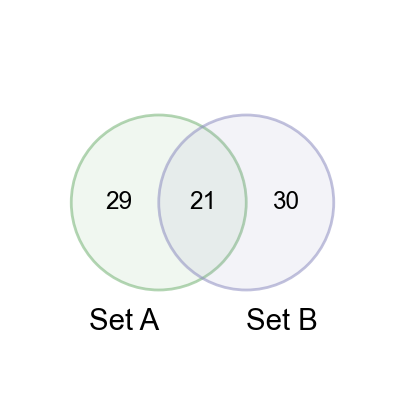

In [2]:
# Create two sets
set1 = set(range(1, 51))    # 1-50
set2 = set(range(30, 81))   # 30-80

# Create 2-way Venn
fig, ax = pp.venn(
    sets=[set1, set2],
    labels=['Set A', 'Set B'],
    colors=pp.get_palette('pastel_categorical', n_colors=2),
    figsize=(10, 5),
)

In [14]:
handles, labels = ax.get_legend_handles_labels()
handles, labels

([], [])

### 6.2 3-Way Venn Diagram

Three-way Venn diagram showing all pairwise and triple overlaps.

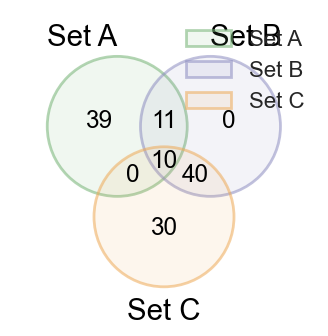

In [ ]:
# Create three sets
setA = set(range(1, 61))     # 1-60
setB = set(range(40, 101))   # 40-100
setC = set(range(51, 131))   # 70-130

# Create 3-way Venn
fig, ax = pp.venn(
    sets=[setA, setB, setC],
    labels=['Set A', 'Set B', 'Set C'],
    colors=pp.get_palette('pastel_categorical', n_colors=3),
)

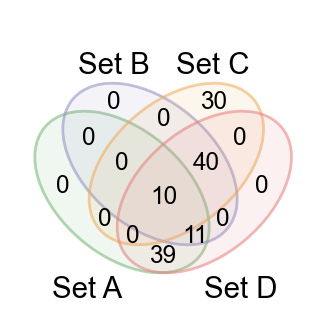

In [4]:
# Create three sets
setA = set(range(1, 61))     # 1-60
setB = set(range(40, 101))   # 40-100
setC = set(range(51, 131))   # 70-130
setD = set(range(1, 101))   # 1-100 

# Create 3-way Venn
fig, ax = pp.venn(
    sets=[setA, setB, setC, setD],
    labels=['Set A', 'Set B', 'Set C', 'Set D'],
    colors=pp.get_palette('pastel_categorical', n_colors=4),
    set_labels=True
)

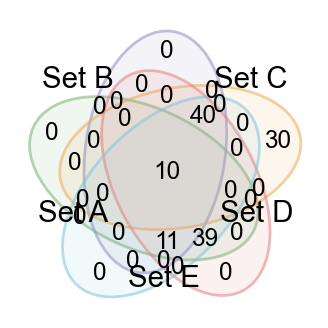

In [5]:
# Create three sets
setA = set(range(1, 61))     # 1-60
setB = set(range(40, 101))   # 40-100
setC = set(range(51, 131))   # 70-130
setD = set(range(1, 101))   # 1-100 
setE = set(range(1, 101))   # 1-100 

# Create 3-way Venn
fig, ax = pp.venn(
    sets=[setA, setB, setC, setD, setE],
    labels=['Set A', 'Set B', 'Set C', 'Set D', 'Set E'],
    colors=pp.get_palette('pastel_categorical', n_colors=5),
    set_labels=True
)

### 6.3 Venn with Statistical Testing

Test whether overlaps are statistically significant given a universe size.

In [ ]:
# Create gene sets with meaningful overlap
disease_genes = set([f'GENE{i}' for i in range(1, 101)])     # 100 disease genes
pathway_genes = set([f'GENE{i}' for i in range(50, 151)])    # 100 pathway genes

# Create Venn with statistical testing
fig, ax, stats = pp.venn(
    sets={'Disease': disease_genes, 'Pathway': pathway_genes},
    universe_size=20000,  # Total genes in genome
    colors=["#e05252", "#6299d0"],
    figsize=(7.5,8)
)

print("\nStatistical Analysis:")
print(f"Observed overlap: {stats['overlap']}")
print(f"Expected overlap: {stats['expected_overlap']:.2f}")
print(f"Fold enrichment: {stats['fold_enrichment']:.2f}x")
print(f"P-value: {stats['p_value']:.2e}")
print(f"Significant: {stats['significant']}")

plt.tight_layout()
plt.show()

---

## Summary

This notebook demonstrated:

### Bar Plots
- Simple bar plots
- Bar plots with error bars (SE/SD)
- Grouped bars with `hue` (color groups)
- Hatch-only bars (patterns without color grouping)
- Double-split bars (`hue` + `hatch`)
- Horizontal bar plots
- Custom color palettes

### Hatch Modes
- Three density modes (sparse, medium, dense)
- Global mode setting with `set_hatch_mode()`
- Visual comparison of modes

### Scatter Plots
- Basic scatter plots
- Size encoding
- Categorical hue
- Continuous color scales

### Circle Heatmaps
- Categorical color mapping
- Continuous color scales
- Large heatmaps
- Size and color encoding

### Venn Diagrams
- 2-way and 3-way Venn diagrams
- Statistical significance testing
- Custom colors and styling

For more information, visit the [PubliPlots GitHub repository](https://github.com/jorgebotas/publiplots).